**<h2>Mask R-CNN</h2>**

**Imports**

In [1]:
import os
import sys
import random
import cv2
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("./")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

c:\Users\matth\anaconda3\envs\coco\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\matth\anaconda3\envs\coco\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\matth\anaconda3\envs\coco\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\matth\anaconda3\envs\coco\lib\site-packages\tensorflow\python\frame

**Config**

In [2]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

**Create Model**

In [3]:
import tensorflow as tf
import keras
import h5py
print(tf.__version__)
print(keras.__version__)
print(h5py.__version__)

1.3.0
2.0.8
2.10.0


In [4]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

**Class Names**

In [5]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

**Object Detection**

Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


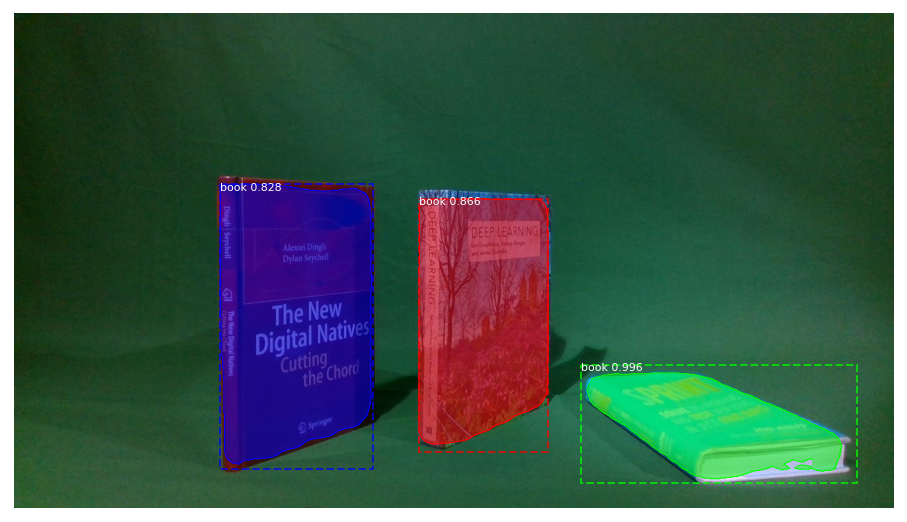

In [6]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

**Display Masks**

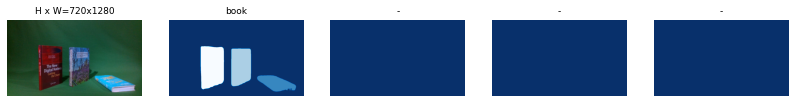

In [7]:
visualize.display_top_masks(image, r['masks'], r['class_ids'], 
                            class_names)

In [8]:
masks = {}

for i in range(len(results[0]['class_ids'])):
    masks[i] = {}
    masks[i]['mask'] = np.array(results[0]['masks'][:, :, i], dtype=np.uint8) * 255

In [9]:
masks

{0: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)},
 1: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)},
 2: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}}

In [10]:
all_masks = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

for i in range(len(results[0]['class_ids'])):
    all_masks += masks[i]['mask']

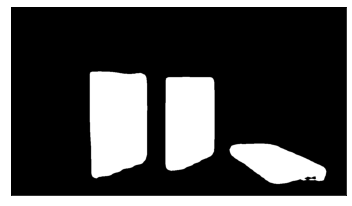

In [11]:
plt.imshow(all_masks, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

**<h2>SaRa</h2>**

In [12]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import saraRC1 as sara

In [13]:
seg_dim = 8

In [14]:
def plot_heatmap(im, grid_size, name=None):
    '''
    Given an image im, this function plots the heatmap generated by SaRa for the given grid size.
    '''

    heatmap, _ = sara.return_sara(im.copy(), grid_size)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    plt.figure(name + ' SaRa Output - Grid Size ' +
               str(grid_size) + ' x ' + str(grid_size))
    plt.gcf().set_size_inches(12, 6)
    plt.imshow(heatmap)
    plt.xticks([])
    plt.yticks([])
    plt.title('SaRa Output - Grid Size ' +
              str(grid_size) + ' x ' + str(grid_size))

In [15]:
s1 = cv2.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
heatmap, sara_list = sara.return_sara(s1.copy(), 8)

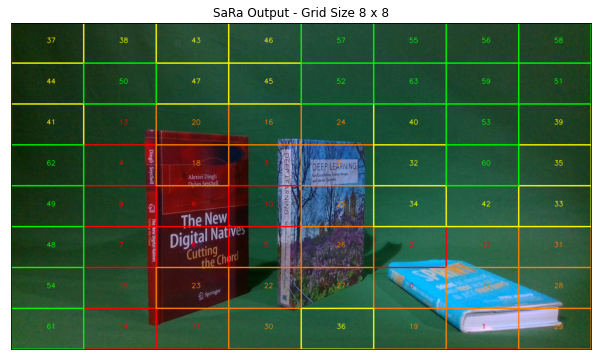

In [16]:
plot_heatmap(s1, seg_dim, 'Original')

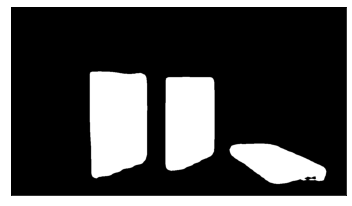

In [17]:
plt.imshow(all_masks, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

**Mask Ranking**

In [18]:
sara_list

[(53, 5.184063507480947e+61, 0, 4),
 (62, 3.940101064963239e+60, 1, 4),
 (45, 5.052818102904647e+57, 2, 4),
 (27, 2.928926475634503e+57, 3, 4),
 (25, 3.1997352188468476e+56, 4, 4),
 (43, 1.5773439010167055e+55, 5, 4),
 (34, 2.689304829734524e+50, 6, 4),
 (41, 3.577372181476187e+48, 7, 4),
 (42, 9.532748797264034e+46, 8, 4),
 (33, 2.2192738077191031e+46, 9, 4),
 (35, 2.4667266542816246e+45, 10, 4),
 (58, 9.492510601861852e+44, 11, 4),
 (46, 6.4261229411826985e+44, 12, 4),
 (17, 2.989018897777034e+44, 13, 4),
 (57, 1.211300629177432e+44, 14, 4),
 (49, 1.1841849053351016e+43, 15, 4),
 (19, 5.9767140616939826e+41, 16, 3),
 (54, 5.263352548726466e+41, 17, 3),
 (26, 5.237422944229051e+41, 18, 3),
 (61, 4.419884310976702e+41, 19, 3),
 (18, 3.878034458171637e+37, 20, 3),
 (28, 1.0915820234305357e+36, 21, 3),
 (51, 1.343475263485098e+35, 22, 3),
 (50, 4.215522992449645e+34, 23, 3),
 (20, 4.673740047926101e+30, 24, 3),
 (36, 4.4952132968235437e+30, 25, 3),
 (44, 2.4411996683148607e+29, 26, 3),
 

In [19]:
T = 0.6

In [20]:
def index_to_coordinates(index, grid_size, im_size):
    '''
    Given an index and a shape, this function returns the corresponding coordinates.
    '''

    x1 = int((index % grid_size) * (im_size[1] / grid_size))
    y1 = int((index // grid_size) * (im_size[0] / grid_size))

    x2 = int(x1 + (im_size[1] / grid_size))
    y2 = int(y1 + (im_size[0] / grid_size))
    
    return (x1, y1, x2, y2)

In [21]:
masks[0]

{'mask': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [22]:
# For each segment, check which mask falls under that segment using MRn = rank(Gi); (Gi interesect Mn) > T
mask_info = {}

for segment in sara_list:
    # Convert index to coordinates, extract segment from heatmap
    x1, y1, x2, y2 = index_to_coordinates(segment[2], seg_dim, s1.shape)

    for m in masks:
        if m not in mask_info:
            mask_info[m] = {}

        # Extract mask from masks
        mask = masks[m]['mask'][y1:y2, x1:x2]

        # Calculate intersection over union
        intersection = np.sum(mask > 0)
        union = np.sum(mask > 0) + np.sum(mask == 0)

        iou = intersection / union

        print('Segment: ', segment[2], 'Mask: ', m, 'IoU: ', iou)

        if iou > T:
            # find tuple in sara_list where index = segment[2]
            i = 0
            while i < len(sara_list):
                if sara_list[i][0] == segment[2]:
                    break
                i += 1

            # Calculate entropy
            entropy = sara_list[i][1]
            # index, rank, iou, entropy
            if 'segments' not in mask_info[m]:
                mask_info[m]['segments'] = []
            
            mask_info[m]['segments'].append((segment[2], segment[0], iou, entropy))

            print('Segment: ', segment[2], 'Mask: ', m, 'IoU: ', iou, 'Entropy: ', entropy)

Segment:  0 Mask:  0 IoU:  0.0
Segment:  0 Mask:  1 IoU:  0.0
Segment:  0 Mask:  2 IoU:  0.0
Segment:  1 Mask:  0 IoU:  0.0
Segment:  1 Mask:  1 IoU:  0.0
Segment:  1 Mask:  2 IoU:  0.0
Segment:  2 Mask:  0 IoU:  0.0
Segment:  2 Mask:  1 IoU:  0.0
Segment:  2 Mask:  2 IoU:  0.0
Segment:  3 Mask:  0 IoU:  0.0
Segment:  3 Mask:  1 IoU:  0.0
Segment:  3 Mask:  2 IoU:  0.0
Segment:  4 Mask:  0 IoU:  0.0
Segment:  4 Mask:  1 IoU:  0.0
Segment:  4 Mask:  2 IoU:  0.0
Segment:  5 Mask:  0 IoU:  0.0
Segment:  5 Mask:  1 IoU:  0.0
Segment:  5 Mask:  2 IoU:  0.0
Segment:  6 Mask:  0 IoU:  0.0
Segment:  6 Mask:  1 IoU:  0.0
Segment:  6 Mask:  2 IoU:  0.0
Segment:  7 Mask:  0 IoU:  0.0
Segment:  7 Mask:  1 IoU:  0.0
Segment:  7 Mask:  2 IoU:  0.0
Segment:  8 Mask:  0 IoU:  0.0
Segment:  8 Mask:  1 IoU:  0.0
Segment:  8 Mask:  2 IoU:  0.0
Segment:  9 Mask:  0 IoU:  0.0
Segment:  9 Mask:  1 IoU:  0.0
Segment:  9 Mask:  2 IoU:  0.0
Segment:  10 Mask:  0 IoU:  0.0
Segment:  10 Mask:  1 IoU:  0.0
Segmen

In [23]:
mask_info

{0: {'segments': [(54, 48, 0.8847916666666666, 5.263352548726466e+41)]},
 1: {'segments': [(28, 55, 0.84625, 1.0915820234305357e+36),
   (36, 60, 0.8625, 4.4952132968235437e+30),
   (44, 8, 0.8602777777777778, 2.4411996683148607e+29)]},
 2: {'segments': [(26, 44, 1.0, 5.237422944229051e+41),
   (34, 37, 1.0, 2.689304829734524e+50),
   (42, 38, 1.0, 9.532748797264034e+46),
   (50, 9, 0.9449305555555556, 4.215522992449645e+34)]}}

In [24]:
# For each mask, find the segment with the lowest rank
mask_segments_min = {}

for m in mask_info:
    # rank, segment iou, segment entropy
    mask_segments_min[m] = [
        min(mask_info[m]['segments'], key=lambda x: x[1])[0],
        min(mask_info[m]['segments'], key=lambda x: x[1])[2],
        min(mask_info[m]['segments'], key=lambda x: x[1])[3]
    ]

mask_segments_min

{0: [54, 0.8847916666666666, 5.263352548726466e+41],
 1: [44, 0.8602777777777778, 2.4411996683148607e+29],
 2: [50, 0.9449305555555556, 4.215522992449645e+34]}

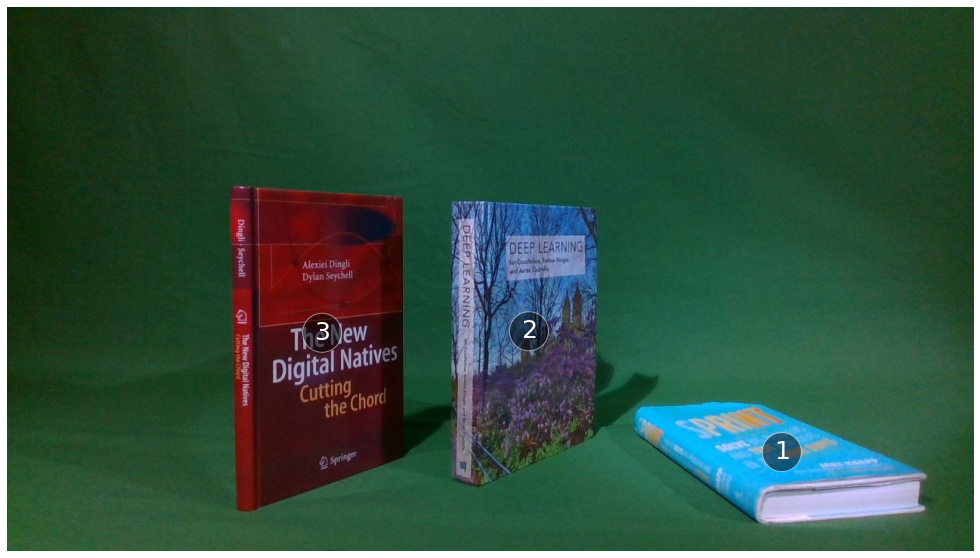

In [33]:
# Display masks with lowest rank
plt.rcParams['figure.figsize'] = [20, 10]
plt.figure()
# plt.imshow(all_masks)
plt.imshow(cv2.cvtColor(s1, cv2.COLOR_BGR2RGB))

for rank in mask_segments_min:
    mask = masks[rank]['mask']

    # Get center of white area
    y, x = np.where(mask > 0)
    y = int(np.mean(y))
    x = int(np.mean(x))


    t = plt.text(x, y, str(rank + 1), color='white', fontsize=25)
    t.set_bbox(dict(facecolor='black', alpha=0.5, edgecolor='white', boxstyle='circle'))

plt.xticks([])
plt.yticks([])

plt.axis('off')

plt.savefig('./output/original.png', bbox_inches='tight', pad_inches=0, dpi=300)

plt.show()

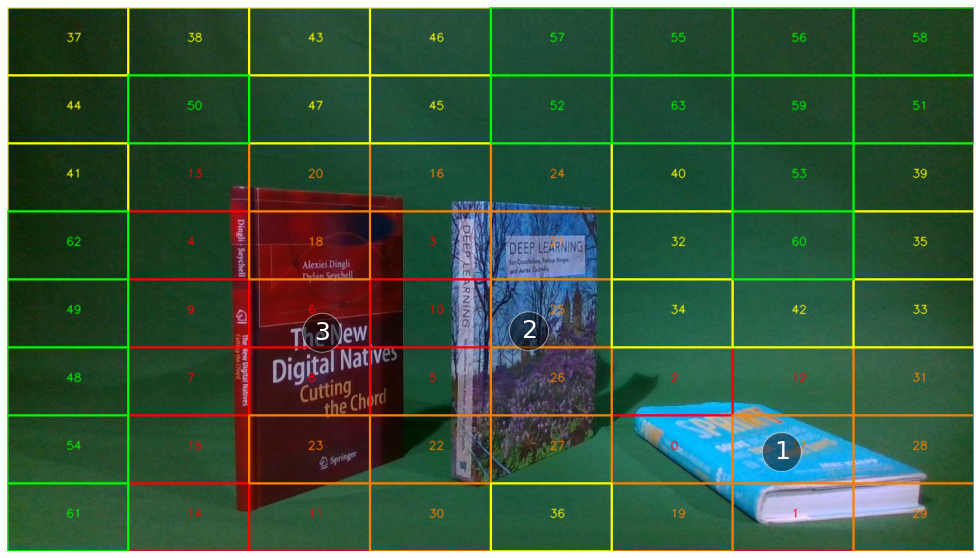

In [26]:
# Display masks with lowest rank
plt.rcParams['figure.figsize'] = [20, 10]
plt.figure()
# plt.imshow(all_masks)
plt.imshow(cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB))

for rank in mask_segments_min:
    mask = masks[rank]['mask']

    # Get center of white area
    y, x = np.where(mask > 0)
    y = int(np.mean(y))
    x = int(np.mean(x))


    t = plt.text(x, y, str(rank + 1), color='white', fontsize=25)
    t.set_bbox(dict(facecolor='black', alpha=0.5, edgecolor='white', boxstyle='circle'))

plt.xticks([])
plt.yticks([])

plt.axis('off')

plt.savefig('./output/original_heatmap.png', bbox_inches='tight', pad_inches=0, dpi=300)

plt.show()

In [27]:
# heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
cv2.imwrite('./output/heatmap.png', heatmap)

True

In [28]:
masks

{0: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)},
 1: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)},
 2: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}}

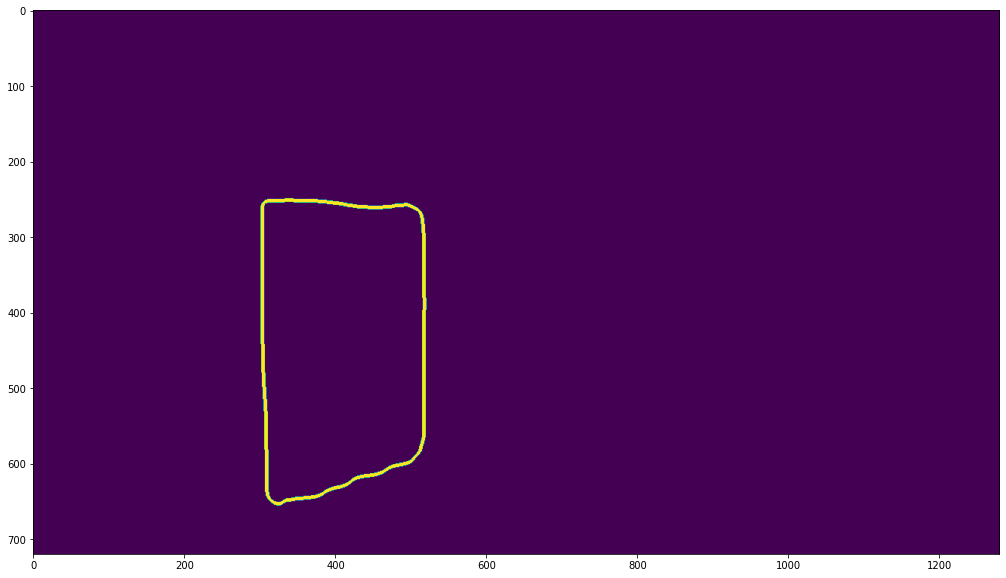

In [71]:
for m in masks:
    mask = masks[m]['mask']

    cv2.imwrite(f'./output/mask_fill{m}.png', mask)

    # convert to outline
    blank = np.zeros(mask.shape)
    contours = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
    mask = cv2.drawContours(blank, contours, -1, (255, 255, 255), 3)

    plt.imshow(mask)

    cv2.imwrite(f'./output/mask{m}.png', mask)

**<h2>pygame</h2>**

In [30]:
import pygame
import sys

pygame 2.5.0 (SDL 2.28.0, Python 3.6.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
pygame.init()

WIDTH = 1280
HEIGHT = 720

# Set the dimensions of the window
original = cv2.imread('./output/original.png')
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
original = cv2.resize(original, (WIDTH, HEIGHT))

original_heatmap = cv2.imread('./output/original_heatmap.png')
original_heatmap = cv2.cvtColor(original_heatmap, cv2.COLOR_BGR2RGB)
original_heatmap = cv2.resize(original_heatmap, (WIDTH, HEIGHT))


screen_width = WIDTH
screen_height = HEIGHT

screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption("Saliency Ranking App")

# main_image = pygame.image.load('./output/original.png').convert_alpha()
main_image = pygame.surfarray.make_surface(original.swapaxes(0, 1))
main_image_heatmap = pygame.surfarray.make_surface(original_heatmap.swapaxes(0, 1))

mask_imgs = []
mask_fill_imgs = []

for i in range(3):
    mask_imgs.append(pygame.image.load('./output/mask' + str(i) + '.png'))
    mask_imgs[i] = pygame.transform.scale(mask_imgs[i], (screen_width, screen_height))

    mask_fill_imgs.append(pygame.image.load('./output/mask_fill' + str(i) + '.png'))
    mask_fill_imgs[i] = pygame.transform.scale(mask_fill_imgs[i], (screen_width, screen_height))


hovered_mask = None

font = pygame.font.Font(None, 24)  # Create a font for displaying text

running = True

show_heatmap = False
show_masks = False

legend_font = pygame.font.Font(None, 32)  # Font for the legend

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_h:  # Listen for the spacebar key press
                show_heatmap = not show_heatmap  # Toggle the show_heatmap state
            elif event.key == pygame.K_m:
                show_masks = not show_masks

    screen.fill((0, 0, 0))  # Fill the screen with black

    # Blit main image and masks onto the screen
    if show_heatmap:
        screen.blit(main_image_heatmap, (0, 0))
    else:
        screen.blit(main_image, (0, 0))

    if show_masks:
        for mask in mask_imgs:
            screen.blit(mask, (0, 0), special_flags=pygame.BLEND_RGBA_ADD)

    legend_text_heatmap = legend_font.render("H: Toggle Heatmap", True, (255, 255, 255))
    legend_text_masks = legend_font.render("M: Toggle Masks", True, (255, 255, 255))

    legend_width = max(legend_text_heatmap.get_width(), legend_text_masks.get_width())
    legend_height = legend_text_heatmap.get_height() + legend_text_masks.get_height()

    legend_bg = pygame.Surface((legend_width + 20, legend_height + 10))
    legend_bg.set_alpha(128)  # Set the alpha value to make it transparent
    legend_bg.fill((0, 0, 0))
    screen.blit(legend_bg, (screen_width - legend_bg.get_width(), 10))

    screen.blit(legend_text_heatmap, (screen_width - legend_text_heatmap.get_width() - 10, 15))
    screen.blit(legend_text_masks, (screen_width - legend_text_masks.get_width() - 10, 15 + legend_text_heatmap.get_height()))


    # for mask in mask_imgs:
    #     screen.blit(mask, (0, 0), special_flags=pygame.BLEND_RGBA_ADD)

    # Inside the main loop
    mouse_x, mouse_y = pygame.mouse.get_pos()

    # Check if the mouse is hovering over a mask
    for i in range(len(mask_fill_imgs)):
        # check if mouse is hovering over mask i's white points
        if mask_fill_imgs[i].get_at((mouse_x, mouse_y)) == (255, 255, 255, 255):
            hovered_mask = i
            break
        else:
            hovered_mask = None

    # Display the hovered mask's index
    if hovered_mask is not None:
        # black background, white font, display object index and rank
        title_text = font.render("Object " + str(hovered_mask + 1), True, (255, 255, 255))
        
        info = mask_segments_min[hovered_mask]
        rank = info[0]
        iou = np.round(info[1], 2)
        entropy = np.round(info[2], 2)

        rank_text = font.render("Rank: " + str(rank), True, (255, 255, 255))
        iou_text = font.render("IoU: " + str(iou), True, (255, 255, 255))
        entropy_text = font.render("Entropy: " + str(entropy), True, (255, 255, 255))

        width = entropy_text.get_width()
        height = title_text.get_height() + rank_text.get_height() + iou_text.get_height() + entropy_text.get_height()

        bg = pygame.Surface((width, height))

        bg.fill((16, 16, 16))

        inc = 10
        
        # Blit the text onto the background
        screen.blit(bg, (mouse_x + inc, mouse_y - inc))
        screen.blit(title_text, (mouse_x + inc, mouse_y - inc))
        screen.blit(rank_text, (mouse_x + inc, mouse_y - inc + title_text.get_height()))
        screen.blit(iou_text, (mouse_x + inc, mouse_y - inc + title_text.get_height() + rank_text.get_height()))
        screen.blit(entropy_text, (mouse_x + inc, mouse_y - inc + title_text.get_height() + rank_text.get_height() + iou_text.get_height()))
    



    pygame.display.flip()  # Update the display

pygame.quit()
sys.exit()
